#**STUDENT GRADE PREDICTION**

**OBJECTIVE**

The objective of the student's grade prediction model is to predict how well the students are going to perform so that we can help the students whose grades are predicted low.
It is a way of predicting a student grade based on his/her previous marks and various other factors like health, failures, family support, etc.

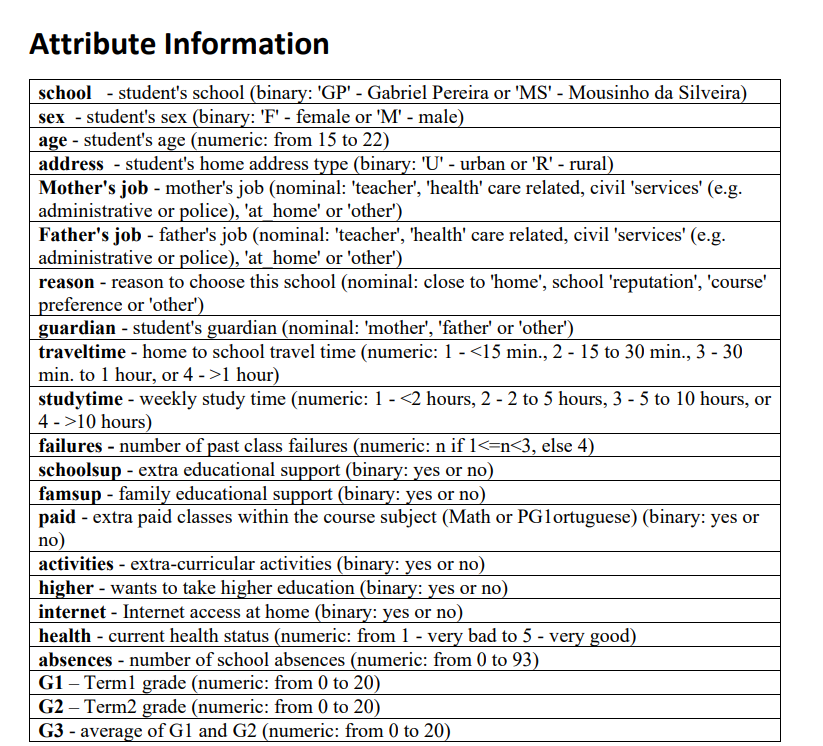

**Importing required panda Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as pyplot

**Reading the CSV file**

In [ ]:
df = pd.read_csv('/content/student grades.csv')
df.head()

,school,sex,age,address,Mothers job,Fathers job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,health,absences,G1,G2,G3
0,GP,F,18,U,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,no,3.0,6.0,5,6.0,6.0
1,GP,F,17,U,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,yes,yes,3.0,4.0,5,5.0,6.0
2,GP,F,15,U,at_home,other,other,mother,1.0,2.0,3.0,yes,no,yes,no,yes,yes,3.0,10.0,7,8.0,10.0
3,GP,F,15,U,health,services,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,5.0,2.0,15,14.0,15.0
4,GP,F,16,U,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,no,5.0,4.0,6,10.0,10.0


In [ ]:
df.sample(n=5) #Returns 5 random sample from the dataframe

,school,sex,age,address,Mothers job,Fathers job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,health,absences,G1,G2,G3
193,GP,M,16,R,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,yes,5.0,8.0,8,9.0,10.0
815,MS,M,19,R,other,other,home,other,3.0,1.0,1.0,no,yes,no,no,yes,yes,5.0,4.0,8,9.0,10.0
324,GP,F,17,U,at_home,at_home,home,father,2.0,3.0,0.0,no,no,no,no,yes,yes,2.0,14.0,16,15.0,15.0
871,MS,M,18,U,teacher,teacher,home,father,1.0,2.0,0.0,no,no,no,yes,yes,yes,2.0,4.0,17,18.0,19.0
191,GP,F,17,U,at_home,services,course,mother,1.0,2.0,0.0,no,no,no,yes,yes,yes,3.0,0.0,8,8.0,9.0


In [ ]:
r,c=df.shape #Returns tuple of shape (rows, columns) of dataframe
print("Number of rows : ",r)
print("Number of columns : ",c)
print("Total number of contents in the dataset : ",df.size) #Returns size of dataframe which is equivalent to total number of elements (rows x columns)

Number of rows :  916
Number of columns :  22
Total number of contents in the dataset :  20152


In [ ]:
df.columns #Returns the column names

Index(['school', 'sex', 'age', 'address', 'Mothers job', 'Fathers job',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet',
       'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df.info() #Information regarding the datset - The columns, Number of non-null values in each column, Data type of each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       915 non-null    object 
 1   sex          915 non-null    object 
 2   age          916 non-null    int64  
 3   address      915 non-null    object 
 4   Mothers job  915 non-null    object 
 5   Fathers job  915 non-null    object 
 6   reason       911 non-null    object 
 7   guardian     916 non-null    object 
 8   traveltime   915 non-null    float64
 9   studytime    912 non-null    float64
 10  failures     915 non-null    float64
 11  schoolsup    914 non-null    object 
 12  famsup       916 non-null    object 
 13  paid         916 non-null    object 
 14  activities   914 non-null    object 
 15  higher       914 non-null    object 
 16  internet     915 non-null    object 
 17  health       913 non-null    float64
 18  absences     911 non-null    float64
 19  G1      

In [ ]:
df.dtypes #Returns a series with the data type of each column

school          object
sex             object
age              int64
address         object
Mothers job     object
Fathers job     object
reason          object
guardian        object
traveltime     float64
studytime      float64
failures       float64
schoolsup       object
famsup          object
paid            object
activities      object
higher          object
internet        object
health         float64
absences       float64
G1               int64
G2             float64
G3             float64
dtype: object

#**PRE-PROCESSING**

In [ ]:
df.isnull().sum() #returns the sum of missing values of each attribute in the data set.

school         1
sex            1
age            0
address        1
Mothers job    1
Fathers job    1
reason         5
guardian       0
traveltime     1
studytime      4
failures       1
schoolsup      2
famsup         0
paid           0
activities     2
higher         2
internet       1
health         3
absences       5
G1             0
G2             4
G3             2
dtype: int64

**Replacing Values**

In [ ]:
c= {"Mother's job": {"at_home": 'home_maker'},"reason": {"reputation":"recog","home":"family"}}
df.replace(c, inplace=True)
'''The value at_home is replaced with the value 'home_maker' in the Mother's job column. The value 'reputation' is replaced with the value 'recog' 
and the value 'home' is replaced with the value 'family' in the reason column. Since inplace = true is used, the change is reflected in the original dataset'''
df.head()

,school,sex,age,address,Mothers job,Fathers job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,health,absences,G1,G2,G3
0,GP,F,18,U,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,no,3.0,6.0,5,6.0,6.0
1,GP,F,17,U,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,yes,yes,3.0,4.0,5,5.0,6.0
2,GP,F,15,U,at_home,other,other,mother,1.0,2.0,3.0,yes,no,yes,no,yes,yes,3.0,10.0,7,8.0,10.0
3,GP,F,15,U,health,services,family,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,5.0,2.0,15,14.0,15.0
4,GP,F,16,U,other,other,family,father,1.0,2.0,0.0,no,yes,yes,no,yes,no,5.0,4.0,6,10.0,10.0


**Replacing null values**

In [ ]:
df['G3'].fillna((df['G2'] + df['G1'])/2,inplace=True) #Null value in the G3 attribute are filled with the average value of G1 and G2
df['G2'].fillna(0,inplace=True)
df['G1'].fillna(0,inplace=True)
df.dropna(axis=0,how ='all',inplace=True)
df.size

20152

In [ ]:
obj_df = df.select_dtypes(include=['object']).copy() #Extracting all the categorical features and storing it in the dataframe obj_df
obj_df.head()

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet
0,GP,F,U,at_home,teacher,course,mother,yes,no,no,no,yes,no
1,GP,F,U,at_home,other,course,father,no,yes,no,no,yes,yes
2,GP,F,U,at_home,other,other,mother,yes,no,yes,no,yes,yes
3,GP,F,U,health,services,family,mother,no,yes,yes,yes,yes,yes
4,GP,F,U,other,other,family,father,no,yes,yes,no,yes,no


In [ ]:
num_features = df.select_dtypes(include = ['float64', 'int64']).copy() #Extracting all the features with data type integer and storing it in the dataframe num_features
num=num_features#Storing a copy of the features in num_feature which has numerical values to the dataframe num
num.drop(['G3', 'G2','G1'], axis='columns', inplace=True) #Dropping columns G1, G2, G3
num.tail(13)

,age,traveltime,studytime,failures,health,absences
903,16,2.0,1.0,0.0,5.0,4.0
904,16,1.0,2.0,2.0,5.0,0.0
905,15,2.0,1.0,0.0,5.0,6.0
906,15,3.0,1.0,1.0,1.0,2.0
907,15,2.0,4.0,0.0,3.0,6.0
908,15,1.0,2.0,0.0,1.0,24.0
909,16,1.0,3.0,0.0,5.0,0.0
910,16,2.0,1.0,0.0,2.0,4.0
911,15,1.0,3.0,0.0,5.0,2.0
912,16,1.0,1.0,0.0,1.0,4.0


In [ ]:
missing_values = ['na', '--', 'n/a', 'NA', '-']
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') #Imputes the missing values in the attributes 'age','traveltime','studytime','failures','health','absences' with mean
transformed_values = imputer.fit_transform(num)
num = pd.DataFrame(transformed_values,columns=['age','traveltime','studytime','failures','health','absences'])
num.tail(13)


,age,traveltime,studytime,failures,health,absences
903,16.0,2.0,1.0,0.0,5.0,4.0
904,16.0,1.0,2.0,2.0,5.0,0.0
905,15.0,2.0,1.0,0.0,5.0,6.0
906,15.0,3.0,1.0,1.0,1.0,2.0
907,15.0,2.0,4.0,0.0,3.0,6.0
908,15.0,1.0,2.0,0.0,1.0,24.0
909,16.0,1.0,3.0,0.0,5.0,0.0
910,16.0,2.0,1.0,0.0,2.0,4.0
911,15.0,1.0,3.0,0.0,5.0,2.0
912,16.0,1.0,1.0,0.0,1.0,4.0


In [ ]:
for column in obj_df.columns:
    obj_df[column].fillna(obj_df[column].mode()[0], inplace=True) #Fills the NaN values of categorical attributes with the mode of each attribute
obj_df.head(22)

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet
0,GP,F,U,at_home,teacher,course,mother,yes,no,no,no,yes,no
1,GP,F,U,at_home,other,course,father,no,yes,no,no,yes,yes
2,GP,F,U,at_home,other,other,mother,yes,no,yes,no,yes,yes
3,GP,F,U,health,services,family,mother,no,yes,yes,yes,yes,yes
4,GP,F,U,other,other,family,father,no,yes,yes,no,yes,no
5,GP,M,U,services,other,recog,mother,no,yes,yes,yes,yes,yes
6,GP,M,U,other,other,family,mother,no,no,no,no,yes,yes
7,GP,F,U,other,teacher,family,mother,yes,yes,no,no,yes,no
8,GP,M,U,services,other,family,mother,no,yes,yes,no,yes,yes
9,GP,M,U,other,other,family,mother,no,yes,yes,yes,yes,yes


**Concatinating the dataframe into data after filling in all null values/missing values**

In [ ]:
data = pd.concat([obj_df,num,df['G1'],df['G2'],df['G3']], axis=1) 
data.head()

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet,age,traveltime,studytime,failures,health,absences,G1,G2,G3
0,GP,F,U,at_home,teacher,course,mother,yes,no,no,no,yes,no,18.0,2.0,2.0,0.0,3.0,6.0,5,6.0,6.0
1,GP,F,U,at_home,other,course,father,no,yes,no,no,yes,yes,17.0,1.0,2.0,0.0,3.0,4.0,5,5.0,6.0
2,GP,F,U,at_home,other,other,mother,yes,no,yes,no,yes,yes,15.0,1.0,2.0,3.0,3.0,10.0,7,8.0,10.0
3,GP,F,U,health,services,family,mother,no,yes,yes,yes,yes,yes,15.0,1.0,3.0,0.0,5.0,2.0,15,14.0,15.0
4,GP,F,U,other,other,family,father,no,yes,yes,no,yes,no,16.0,1.0,2.0,0.0,5.0,4.0,6,10.0,10.0


In [ ]:
#To convert float point values to integer data type
data['traveltime'] = data['traveltime'].astype(int) 
data['studytime'] = data['studytime'].astype(int)
data['failures'] = data['failures'].astype(int)
data['health'] = data['health'].astype(int)
data['absences'] = data['absences'].astype(int)

In [ ]:
data.isnull().sum() #There are no null values in the dataframe data after filling

school         0
sex            0
address        0
Mothers job    0
Fathers job    0
reason         0
guardian       0
schoolsup      0
famsup         0
paid           0
activities     0
higher         0
internet       0
age            0
traveltime     0
studytime      0
failures       0
health         0
absences       0
G1             0
G2             0
G3             0
dtype: int64

In [ ]:
g = data.groupby('G3')
g.get_group(20) #Returns the row of the student who scored 20 in G3 

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet,age,traveltime,studytime,failures,health,absences,G1,G2,G3
47,GP,M,U,health,services,recog,mother,no,no,no,yes,yes,yes,16.0,1,4,0,2,4,19,19.0,20.0


In [ ]:
data[data['G3'] == 0]

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet,age,traveltime,studytime,failures,health,absences,G1,G2,G3
19,GP,F,U,health,other,family,father,no,no,yes,yes,yes,yes,16.0,1,1,0,5,4,8,0.0,0.0
62,GP,F,U,other,services,recog,father,yes,no,no,yes,yes,yes,16.0,1,2,0,1,4,0,0.0,0.0
128,GP,M,R,services,other,recog,mother,no,yes,no,yes,yes,yes,18.0,1,1,2,4,0,7,4.0,0.0
130,GP,F,R,services,teacher,course,father,no,yes,no,no,yes,yes,15.0,2,3,2,5,0,12,0.0,0.0
131,GP,F,U,at_home,other,course,mother,no,yes,no,yes,yes,yes,15.0,3,1,0,4,0,8,0.0,0.0
134,GP,M,R,at_home,teacher,course,mother,no,yes,no,no,yes,no,15.0,4,2,0,5,0,9,0.0,0.0
135,GP,F,U,services,at_home,course,mother,no,yes,no,yes,yes,yes,18.0,1,3,0,5,15,11,0.0,0.0
136,GP,M,R,at_home,other,course,mother,no,no,no,no,yes,no,17.0,3,2,0,5,0,10,0.0,0.0
137,GP,F,U,other,other,course,other,no,yes,no,yes,yes,yes,16.0,2,1,2,5,1,4,0.0,0.0
140,GP,M,U,teacher,services,course,father,yes,yes,no,no,yes,yes,17.0,2,4,0,3,6,7,9.0,0.0


In [ ]:
data.loc[data['G3'] == 0, 'G3']= (data["G1"] + data["G2"])/2 #Returns the students who scored 0 in final grade
data[data['G3'] == 0]

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet,age,traveltime,studytime,failures,health,absences,G1,G2,G3
62,GP,F,U,other,services,recog,father,yes,no,no,yes,yes,yes,16.0,1,2,0,1,4,0,0.0,0.0
277,GP,M,U,teacher,services,family,mother,no,no,no,yes,yes,yes,18.0,2,1,0,3,23,0,0.0,0.0
394,MS,M,U,other,at_home,course,father,no,no,no,no,yes,yes,19.0,1,1,0,5,5,0,0.0,0.0


In [ ]:
for i in obj_df.columns:
    print("---- %s ---" % i)
    print(obj_df[i].value_counts()) #Returns the count of each class under each categorical attribute
    print("\n")

---- school ---
GP    645
MS    271
Name: school, dtype: int64


---- sex ---
F    527
M    389
Name: sex, dtype: int64


---- address ---
U    646
R    270
Name: address, dtype: int64


---- Mothers job ---
other       353
services    203
at_home     183
teacher     111
health       66
Name: Mothers job, dtype: int64


---- Fathers job ---
other       517
services    258
at_home      58
teacher      54
health       29
Name: Fathers job, dtype: int64


---- reason ---
course    395
family    216
recog     211
other      94
Name: reason, dtype: int64


---- guardian ---
mother    639
father    206
other      71
Name: guardian, dtype: int64


---- schoolsup ---
no     833
yes     83
Name: schoolsup, dtype: int64


---- famsup ---
yes    547
no     369
Name: famsup, dtype: int64


---- paid ---
no     708
yes    208
Name: paid, dtype: int64


---- activities ---
no     473
yes    443
Name: activities, dtype: int64


---- higher ---
yes    828
no      88
Name: higher, dtype: int64


---- i

In [ ]:
for x in obj_df.columns:
    print(x ,':', len(obj_df[x].unique())) #Returns the count of unique classes under each categorical attribute

school : 2
sex : 2
address : 2
Mothers job : 5
Fathers job : 5
reason : 4
guardian : 3
schoolsup : 2
famsup : 2
paid : 2
activities : 2
higher : 2
internet : 2


**ONE HOT ENCODING**

In one-hot encoding, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. 
Here categorical features are stored in the dataframe obj_df

In [ ]:
one_hot_encoded_data = pd.get_dummies(obj_df)
one_hot_encoded_data.head(5)

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,Mothers job_at_home,Mothers job_health,Mothers job_other,Mothers job_services,Mothers job_teacher,Fathers job_at_home,Fathers job_health,Fathers job_other,Fathers job_services,Fathers job_teacher,reason_course,reason_family,reason_other,reason_recog,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes
0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0
1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1
2,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1
3,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1
4,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,1,0


**LABEL ENCODING**

In label encoding , we replace the categorical value with a numeric value between 0 and the number of unique classes minus 1.                            
Here categorical features are stored in the dataframe obj_df

In [ ]:
label_encode = obj_df.copy()
le = LabelEncoder()
for i in label_encode.columns:
  label_encode[i]=le.fit_transform(label_encode[i])
label_encode.head()

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet
0,0,0,1,0,4,0,1,1,0,0,0,1,0
1,0,0,1,0,2,0,0,0,1,0,0,1,1
2,0,0,1,0,2,2,1,1,0,1,0,1,1
3,0,0,1,1,3,1,1,0,1,1,1,1,1
4,0,0,1,2,2,1,0,0,1,1,0,1,0


**Converting finalgrade to categorical variable**

In [ ]:
data['FinalGrade'] = np.nan
data.loc[(data.G3 >= 18) & (data.G3 <= 20), 'FinalGrade'] = 'Excellent'
data.loc[(data.G3 >= 15) & (data.G3 <= 17), 'FinalGrade'] = 'Good' # scores b/w 15 to 17 will be marked as good 
data.loc[(data.G3 >= 11) & (data.G3 <= 14), 'FinalGrade'] = 'Satisfactory' 
data.loc[(data.G3 >= 6) & (data.G3 <= 10), 'FinalGrade'] = 'Poor' 
data.loc[(data.G3 >= 0) & (data.G3 <= 5), 'FinalGrade'] = 'Failure' 
data.head(5)

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet,age,traveltime,studytime,failures,health,absences,G1,G2,G3,FinalGrade
0,GP,F,U,at_home,teacher,course,mother,yes,no,no,no,yes,no,18.0,2,2,0,3,6,5,6.0,6.0,Poor
1,GP,F,U,at_home,other,course,father,no,yes,no,no,yes,yes,17.0,1,2,0,3,4,5,5.0,6.0,Poor
2,GP,F,U,at_home,other,other,mother,yes,no,yes,no,yes,yes,15.0,1,2,3,3,10,7,8.0,10.0,Poor
3,GP,F,U,health,services,family,mother,no,yes,yes,yes,yes,yes,15.0,1,3,0,5,2,15,14.0,15.0,Good
4,GP,F,U,other,other,family,father,no,yes,yes,no,yes,no,16.0,1,2,0,5,4,6,10.0,10.0,Poor


# **VISUALIZATION**

**HISTOGRAM**                                                                   
Histogram is used to observe the frequency of individual numeric attributes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


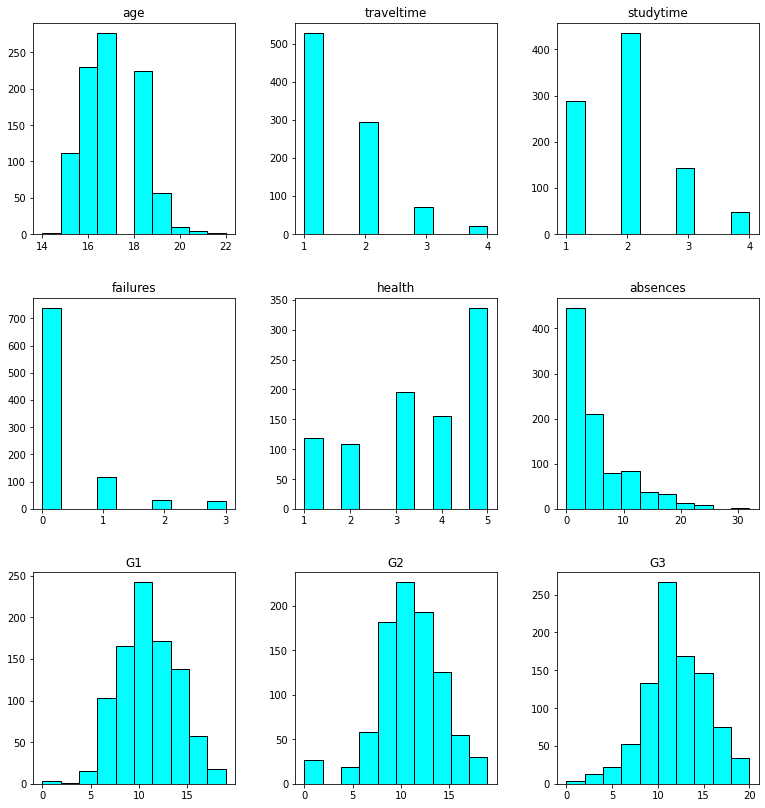

In [ ]:
fig = plt.figure(figsize = (13,14))
ax = fig.gca()
data.hist(ax = ax,color="cyan",bins=10,grid=False,edgecolor="black")
plt.show()

**Bar Plot**

A bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. 

**Observation**

Students who joined in school because of courses, family, recognition perfomed poor 

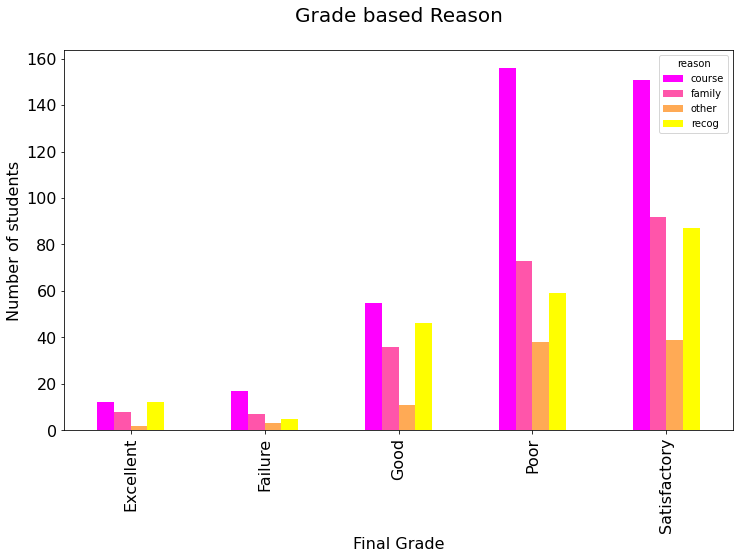

In [ ]:
index = ['Excellent','Failure','Good','Poor','Satisfactory']
health_index = pd.crosstab(index=data['FinalGrade'], columns=data.reason)
health_index.plot.bar(colormap='spring',fontsize=16, figsize=(12,7))
plt.title('Grade based Reason\n', fontsize=20)
plt.ylabel('Number of students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Count plot**

Count plot is used to Show the counts of observations in each categorical bin using bars.

**Observation**

The gender distribution is pretty even.

Text(0.5, 1.0, 'Gender\n')

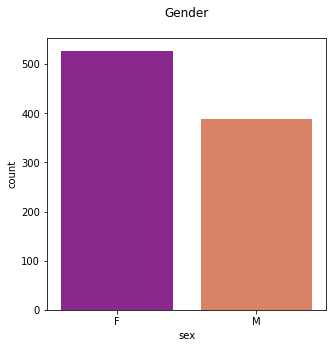

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=data,palette='plasma')# male & female student representaion on countplot
plt.title('Gender\n')

**VIOLIN PLOT**                                                                 

shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

**Observation**

We observe that most of the students who have internet access perform better

Most of the students who have internet access score an averge of 10 to 11

Most of the students who do not have internet access score an averge of 9 to 10

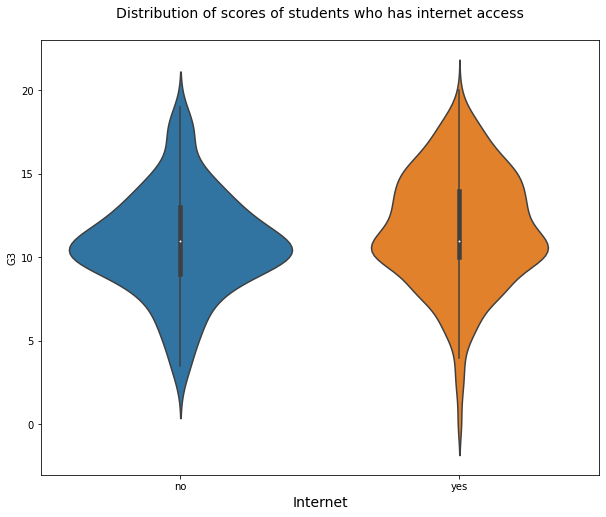

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(x="internet",y="G3",data=data)
ax.set_ylabel('G3');
ax.set_xlabel('Internet', fontsize=14);
ax.grid(False)
ax.set_title('Distribution of scores of students who has internet access\n', fontsize=14);

**Joint Plot**

joint : Draw a plot of two variables with bivariate and univariate graphs ,used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

**Observation** 

final grade and days of absent are not correlated.They are not strongly related

The number of students who attend classes regularly are higher than those do not

Most students scored an average of 10 in their final examination


<Figure size 720x576 with 0 Axes>

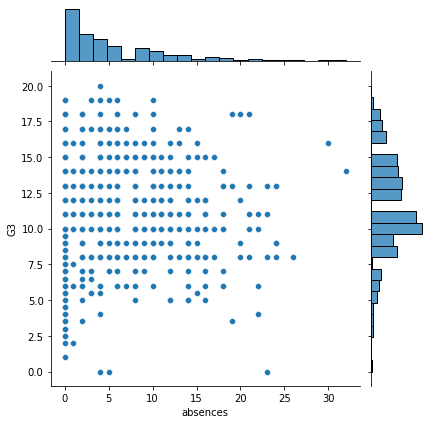

In [ ]:
plt.figure(figsize=(10,8))
sns.jointplot(x = "absences", y = "G3",kind = "scatter", data = data)

**LINE PLOT**  

line: is a linear graph that shows data frequencies along a number line. It can be used to analyze data that has a single defined value.

**Observation**

The final grade doesn't solely depend on G1 score alone and can vary depending on the G2 score

Text(0.5, 1.0, 'G1 vs G3(final grade)\n')

<Figure size 1080x1152 with 0 Axes>

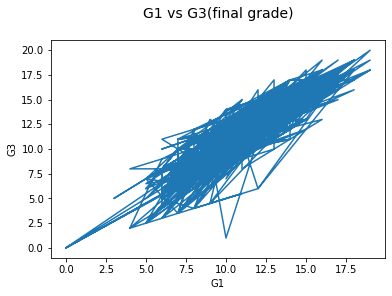

In [ ]:
plt.figure(figsize=(15,16))
fig, ax = plt.subplots()
ax.plot(data['G1'],data['G3'])
ax.set_ylabel('G3')
ax.set_xlabel('G1')
ax.grid(False)
ax.set_title('G1 vs G3(final grade)\n', fontsize=14)



**SCATTER PLOT**

Scatter plot is to observe and show relationships between two numeric variables. If the variables are correlated, the points will fall along a line or curve. The better the correlation, the tighter the points will hug the line.

**Observation**

Students with more number of failures scored below average in the final grade

The plot shows that G3 and failure attribute is highly negatively correlated

The student who scored 20 has 0 failures

students with 3 failures has 10 as their maximum score

Text(0.5, 0, 'Failures')

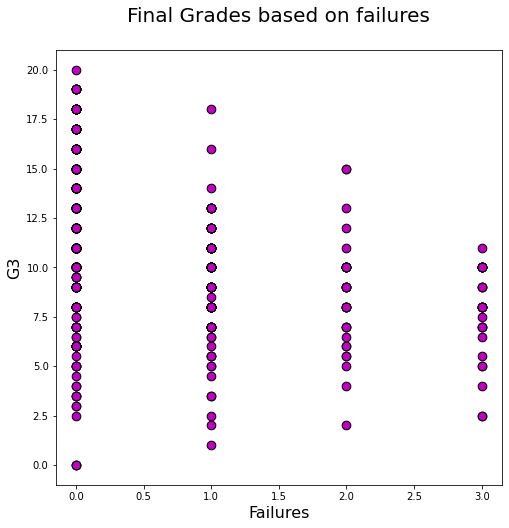

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(data.failures,data.G3,s=75, c="m", edgecolor="black")  
plt.title('Final Grades based on failures\n', fontsize=20)
plt.ylabel('G3', fontsize=16)
plt.xlabel('Failures', fontsize=16)


**SWARM PLOT**

swarm plot is another way of plotting the distribution of an attribute or the joint distribution of a couple of attributes.

**Obsevation** 

The student who studied the most number of hours scored the highest(4 hours) in the final grades

Most of the student who studied for 2 hrs got average score 

Students who scored 0 studied for 2 or less than 2 hours

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'No. of Study hours')

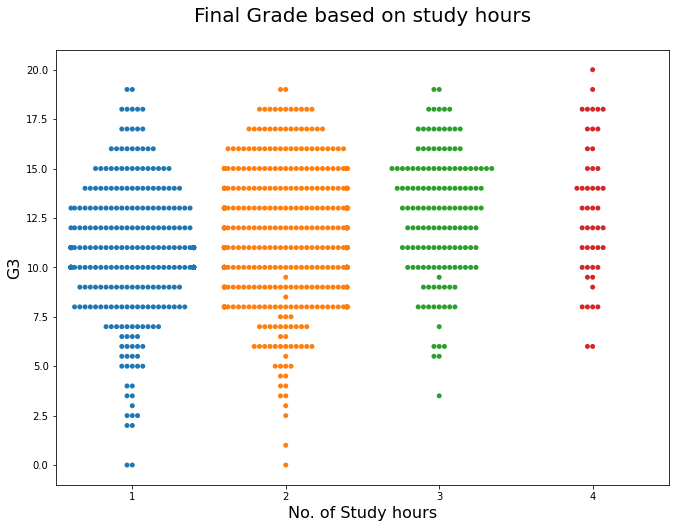

In [ ]:
plt.figure(figsize=(11,8))
sns.swarmplot(x = data.studytime, y = data.G3)
plt.title('Final Grade based on study hours\n', fontsize=20)
plt.ylabel('G3', fontsize=16)
plt.xlabel('No. of Study hours', fontsize=16)


**CAT PLOT**

Cat plot shows the relationship between a numerical and one or more categorical variables using one of several visual representations.

**Observation**                                                                 
Students who participate in extra-curricular activities performed better in the final grade.

Text(0.5, 6.79999999999999, 'Activities')

<Figure size 720x576 with 0 Axes>

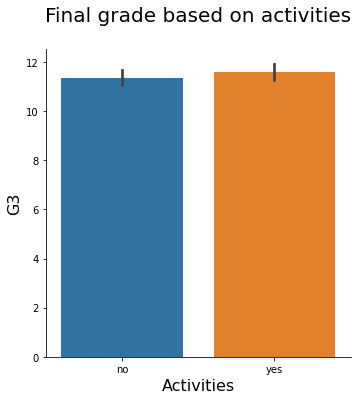

In [ ]:
plt.figure(figsize=(10,8))
sns.catplot(x='activities', y='G3', kind='bar', data=data)
plt.title('Final grade based on activities\n', fontsize=20)
plt.ylabel('G3', fontsize=16)
plt.xlabel('Activities', fontsize=16)

**STRIP PLOT**

strip plot is a graphical data anlysis technique for summarizing a univariate data set.

**Obsevation**

Students who are in urban area has less traveltime

Text(0, 0.5, 'Time taken to travel')

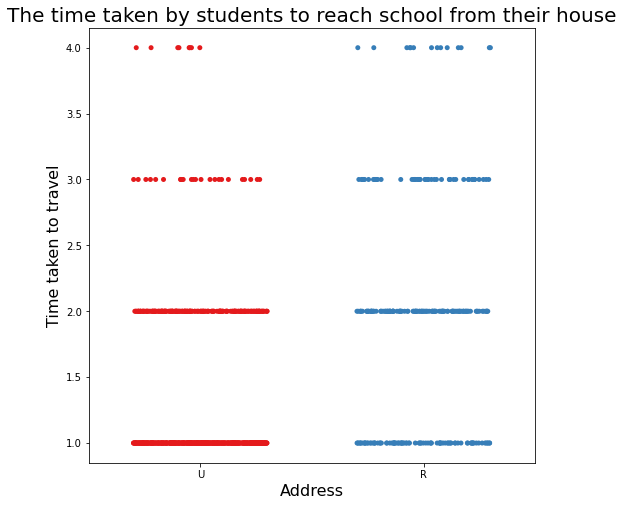

In [ ]:
plt.figure(figsize=(8, 8))
sns.stripplot(x = data.address, palette="Set1", y = data.traveltime , jitter = 0.3)
plt.title('The time taken by students to reach school from their house', fontsize=20)
plt.xlabel('Address', fontsize=16)
plt.ylabel('Time taken to travel', fontsize=16)


**PAIR PLOT**

Pair Plot is used for plotting pairwise relationships in a dataset it allows us to see both distribution of single variables and relationships between two variables.                                                                                                                                      The plot is observed for the numerical features - age, traveltime, studytime, health, absences, G1, G2, G3 

**Observation**                                                                 
                                                                            Univariant distribution occurs when the features are mapped to itself and is represented by a histogram here.                                               
Bivariant distribution occurs when the features are mapped to other numerical features and is represented by a scatterplot here.


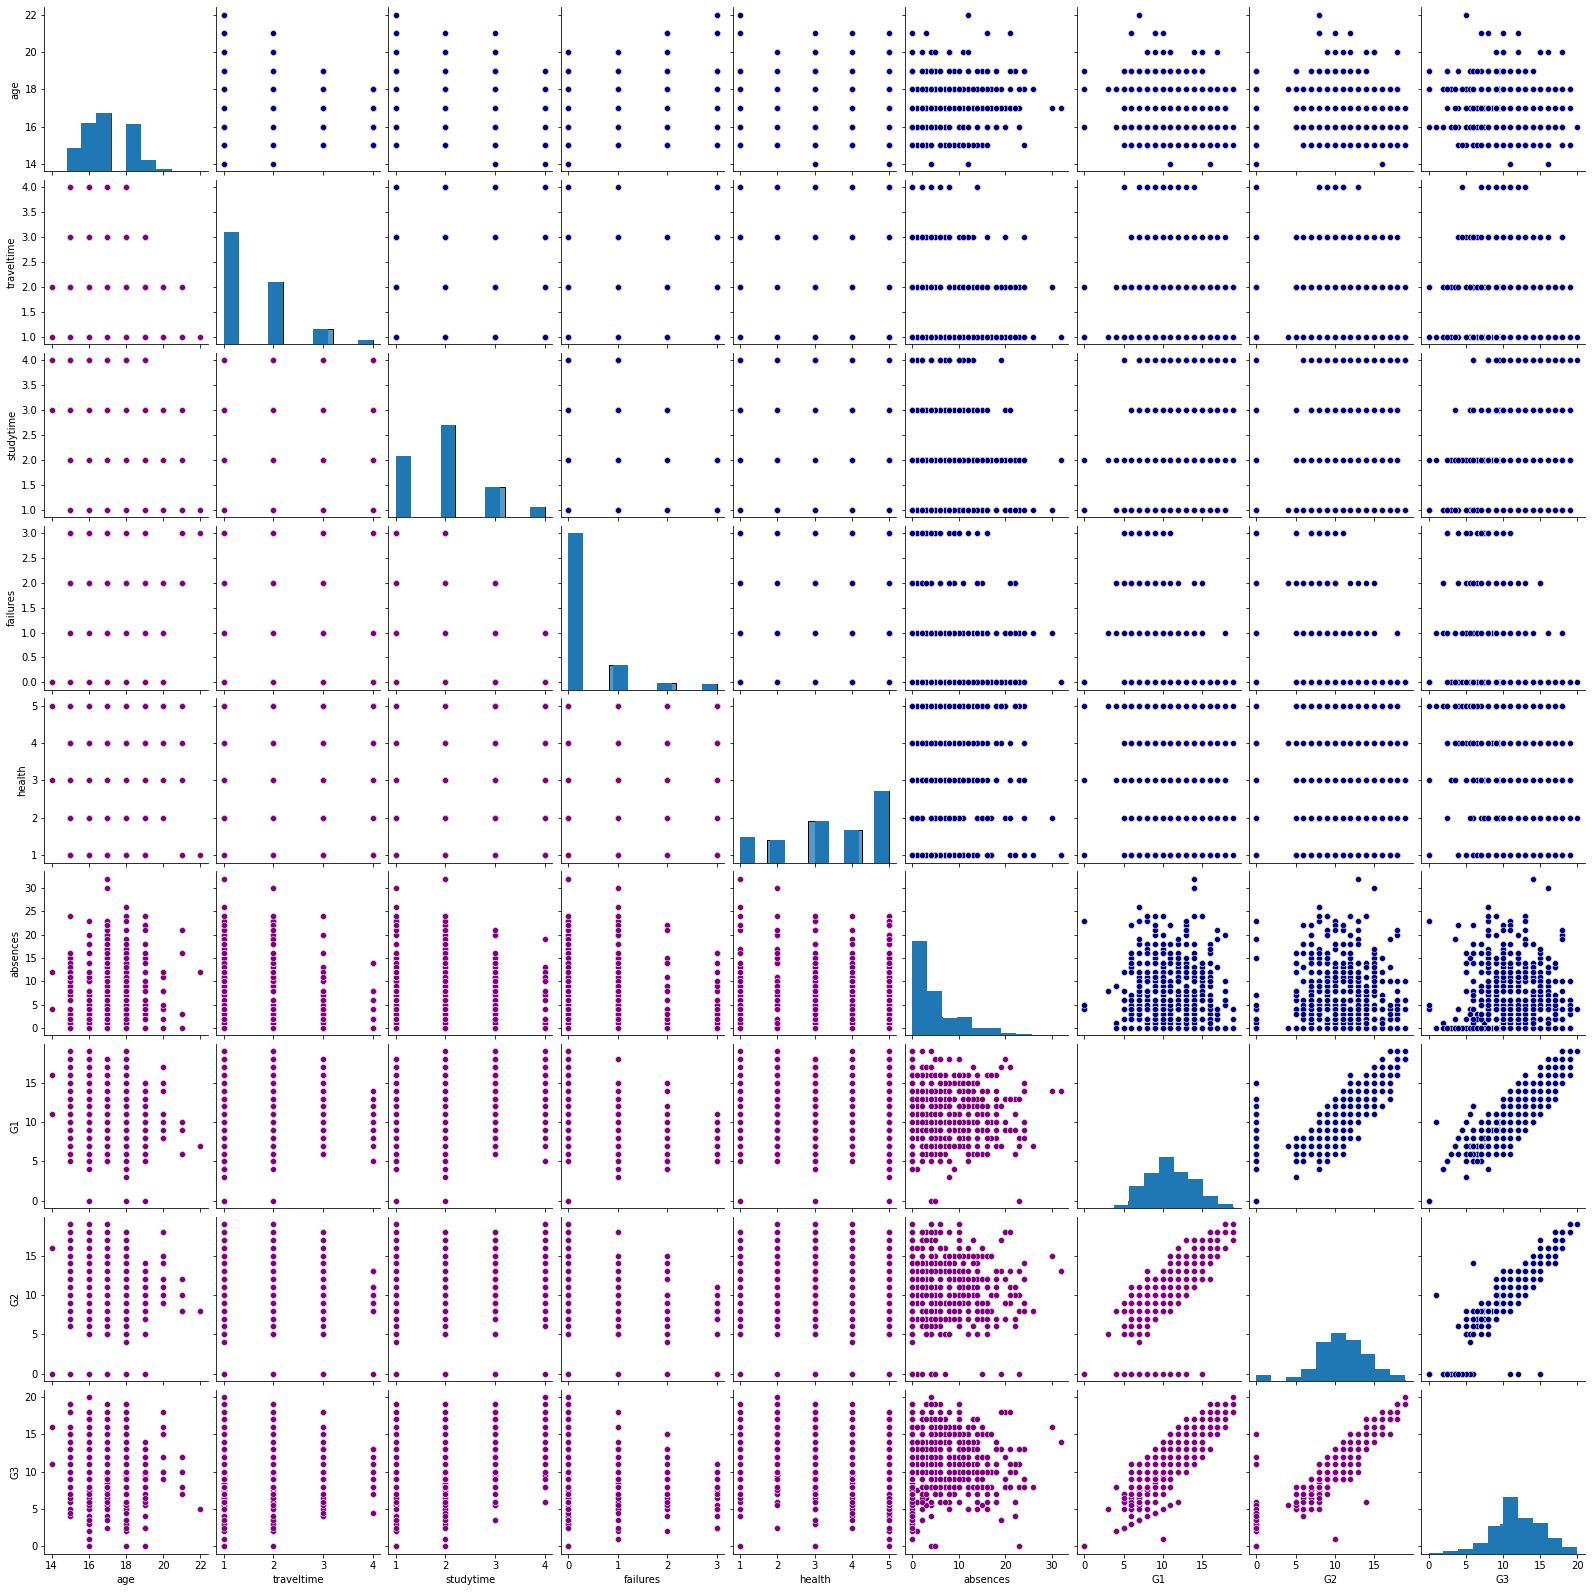

In [ ]:
g1 = sns.pairplot(data)
g1.map_upper(sns.scatterplot,color='navy')
g1.map_lower(sns.scatterplot, color='purple')
g1.map_diag(plt.hist)

**HISTOGRAM**                                                                   
The graph plots the distribuition of final score G3    

**Observation**

Most students scored 10 in their final score    

The final score G3 attribute is negatively(left) skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Final Grade distribuition\n')

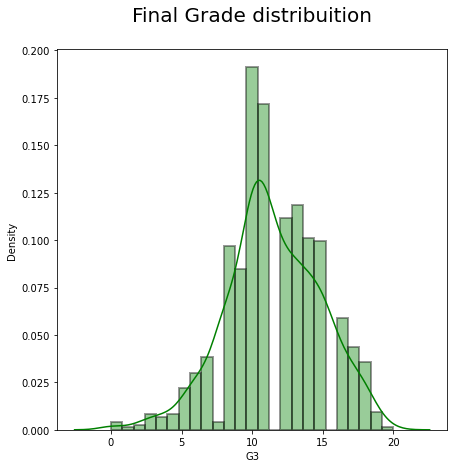

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(data['G3'],color='green', hist_kws=dict(edgecolor="black", linewidth=2))
data['G3'].skew()
plt.title('Final Grade distribuition\n', fontsize=20)

**CORRELATION ANALYSIS USING HEATMAP**                                          

The highly negative correlated values are represented by dark red colour    

The highly positive correlated values are represented by dark green colour  

The lighter shades of red and green represent less correlation or no correlation between features                      
                  
Since the diagonal cells are self mapped to each other so they are highly positively correlated

Here G1,G2 and G3 are perfectly negatively correlated to failures
When G1 or G2 or G3 decrease number of failures decrease and vice versa

G1,G2 are highly positively correlated to G3 When G1 or G2 decrease G3 also decrease and vice versa

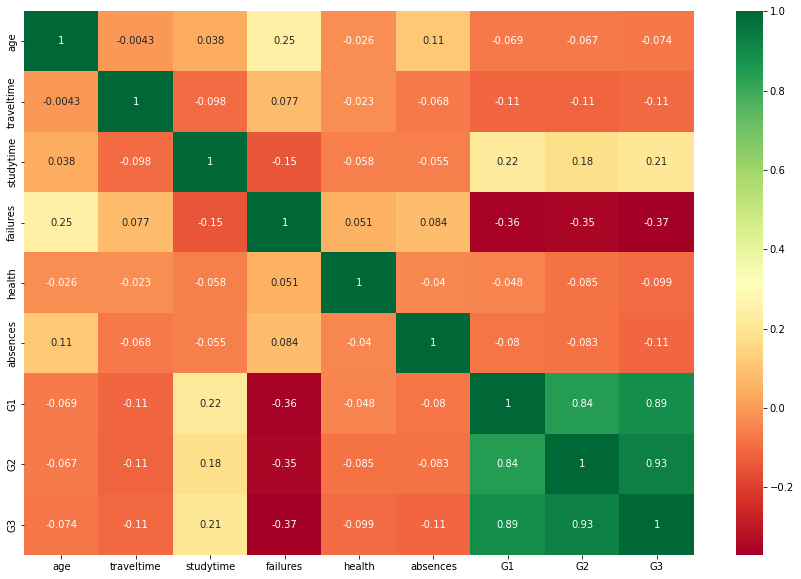

In [ ]:
plt.figure(figsize=(15,10))
g = sns.heatmap(data=data.corr(),annot=True,cmap="RdYlGn")


#**EDA - EXPLORATORY DATA ANALYSIS**

**Box plot**

A box plot is a method for graphically depicting groups of numerical data through their quartiles

**Observation**

Students who wish to go for higher studies score more

Text(0.5, 1.0, 'Higher Education vs Final Grade(G3)')

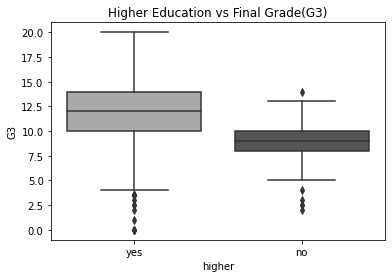

In [ ]:
b = sns.boxplot(x=data['higher'],y=data['G3'],palette='binary')
b.axes.set_title('Higher Education vs Final Grade(G3)')

**REGRESSION PLOT**

Regression plot creates a regression line between 2 parameters and helps to visualize their linear relationships

**Observation**

G2 and G3 and highy positively correlated.There is a linear increase

Text(0.5, 1.0, 'Mid term 2 Grades(G2) VS Final Grades(G3)\n')

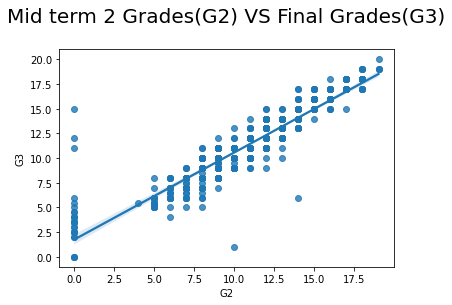

In [ ]:
sns.regplot(x='G2', y='G3', data=data)
plt.title('Mid term 2 Grades(G2) VS Final Grades(G3)\n', fontsize=20)

**KDE PLOT**

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram it is a way to estimate the probability density function of a continuous random variable

**Observation**

The  graph clearly shows there is not much difference between the grades based on location

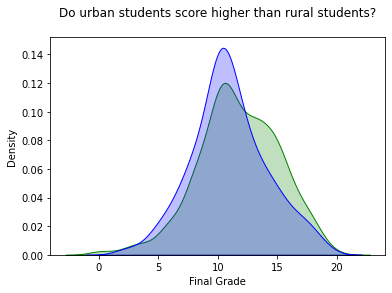

In [ ]:
# Grade distribution by address
sns.kdeplot(data.loc[(data['address'] == 'U'), 'G3'],color='green',shade = True,Label='Urban')
sns.kdeplot(data.loc[(data['address'] == 'R'), 'G3'],color='blue', shade = True,Label='Rural')
plt.title('Do urban students score higher than rural students?\n')
plt.xlabel('Final Grade');
plt.ylabel('Density')
plt.show()

**PIE CHART**

A pie chart is a type of data visualization that is used to illustrate numerical proportions in data. Pie charts typically show relative proportions of different categories in a data set.

**Obsevation**

Performance comparison of two schools score in G3

School Gabriel Pereira(GP) performed better than Mousinho da Silveira(MS)

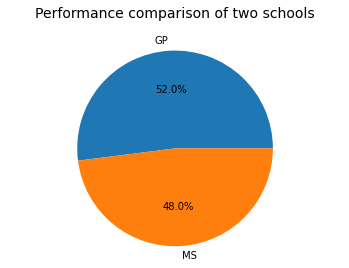

In [ ]:
g = df.groupby(['school']).G3.mean()
my_labels = 'GP','MS'
plt.pie(g,labels=my_labels,autopct='%1.1f%%')
plt.title('Performance comparison of two schools\n',fontsize=14) 
plt.axis('equal')
plt.show()

**Box Plot**

**Observation**

The plot shows that the median grades of the three age groups(15,16,17) are similar. Note the skewness of age group 20.Age group 20 seems to score highest grades among all.

Text(0.5, 1.0, 'Age vs Final Grade\n')

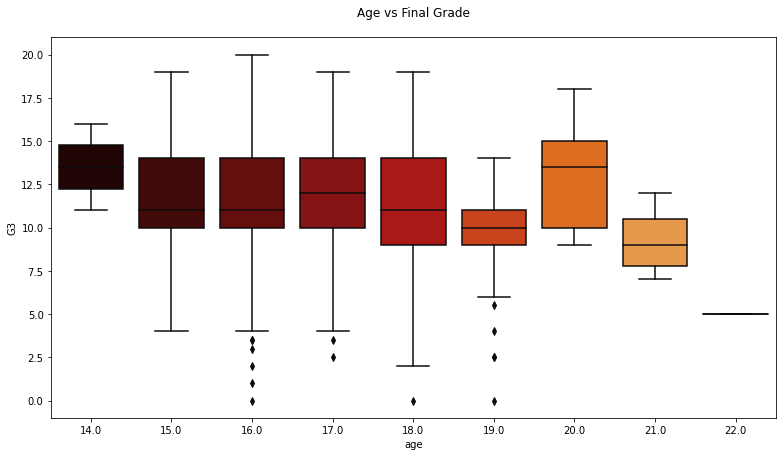

In [ ]:
plt.figure(figsize=(13,7))
b= sns.boxplot(x='age', y='G3',data=data,palette='gist_heat')
b.axes.set_title('Age vs Final Grade\n')

In [ ]:
data.describe()#Stastical measures of the numerical attributes in the dataset - mean, max, min, count, standard deviation...etc

,age,traveltime,studytime,failures,health,absences,G1,G2,G3
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,16.923581,1.550218,1.947598,0.290393,3.527293,4.967249,11.042576,11.021834,11.471616
std,1.198656,0.741207,0.824147,0.679726,1.415881,5.576592,3.097565,3.540177,3.356303
min,14.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,2.000000,0.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,3.000000,5.000000,32.000000,19.000000,19.000000,20.000000



To display the five point summary and visualize whether outliers are present in the attributes using box plot.                                                  

**Observation**

There are outliers present for the attributes traveltime, studytime, absences, G1 and G2.



Text(0.5, 1.0, 'Distribution of grade\n')

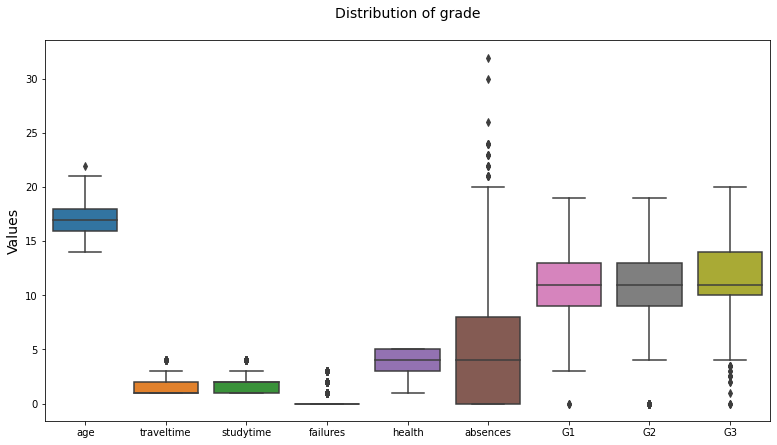

In [ ]:
plt.figure(figsize=(13,7))
ax = sns.boxplot(data=data)
ax.set_ylabel('Values', fontsize=14)
ax.grid(False)
ax.set_title('Distribution of grade\n', fontsize=14)

**FIVEPOINT SUMMARY - min, Q1, Q2(median), Q3, max**

**OUTLIERS**

To display the five point summary and visualize whether outliers are present in the attribute numerical attribute using box plot.



In [ ]:
def outliers(data,i):
  q1=data[i].quantile(0.25)#Finding first quartile - 25%
  q2=data[i].quantile(0.50)#Finding first quartile - 50%
  q3=data[i].quantile(0.75)#Finding first quartile - 75%
  data_min, data_max = min(data[i]), max(data[i])
  print(i)
  print('Min: %.3f' % data_min)
  print('Q1: %.3f' % q1)
  print('Median: %.3f' % q2)
  print('Q3: %.3f' % q3)
  print('Max: %.3f' % data_max)
  IQR = q3-q1
  lower_boundary = q1 - 1.5 * IQR
  Upper_boundary = q3 + 1.5 * IQR
  print(lower_boundary)
  print(Upper_boundary)
  ls = data.index[(data[i]<lower_boundary)|(data[i]>Upper_boundary)]#Finding and storing the outliers of the numeric features in a list
  print(ls)
  print("\n")
  return ls

**Removing Outliers**


In [ ]:
lst1=[] #used to store all the ouliers
for i in ['age','traveltime','studytime','health','G1','G2','G3','health','failures','absences']:
  lst1.extend(outliers(data,i))  
def remove(data,l):
  l=sorted(set(l))
  data = data.drop(index=l)#Removing all the ouliers present.
  return data

data=remove(data,lst1)#The dataset after removing outliers is stored in data itself


age
Min: 14.000
Q1: 16.000
Median: 17.000
Q3: 18.000
Max: 22.000
13.0
21.0
Int64Index([514], dtype='int64')


traveltime
Min: 1.000
Q1: 1.000
Median: 1.000
Q3: 2.000
Max: 4.000
-0.5
3.5
Int64Index([ 61, 108, 134, 149, 164, 228, 327, 375, 397, 413, 477, 497, 614,
            620, 680, 693, 694, 762, 866, 894, 896, 899],
           dtype='int64')


studytime
Min: 1.000
Q1: 1.000
Median: 2.000
Q3: 2.000
Max: 4.000
-0.5
3.5
Int64Index([ 47,  66,  67,  69,  70,  71,  76,  77,  94,  95, 105, 106, 108,
            121, 140, 204, 210, 256, 259, 271, 282, 293, 298, 303, 330, 334,
            338, 453, 459, 524, 533, 547, 562, 573, 578, 584, 618, 625, 628,
            669, 693, 732, 737, 738, 758, 771, 841, 907],
           dtype='int64')


health
Min: 1.000
Q1: 3.000
Median: 4.000
Q3: 5.000
Max: 5.000
0.0
8.0
Int64Index([], dtype='int64')


G1
Min: 0.000
Q1: 9.000
Median: 11.000
Q3: 13.000
Max: 19.000
3.0
19.0
Int64Index([62, 277, 394], dtype='int64')


G2
Min: 0.000
Q1: 9.000
Median: 11.000
Q3


Displaying the feature G1 ,G2 and G3 without outliers

<Figure size 936x360 with 0 Axes>

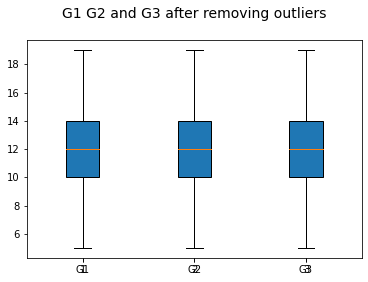

In [ ]:
plt.figure(figsize=(13,5))
columns = [data.G1,data.G2,data.G3]
fig, ax = plt.subplots()
plt.xticks([1, 2, 3],["G1","G2","G3"])
ax.boxplot(columns,patch_artist=True)
ax.set_title('G1 G2 and G3 after removing outliers\n', fontsize=14)
plt.show()

In [ ]:
data.to_csv("students prediciton.csv",index=False)

#**FEATURE SCALING**

In [ ]:
scaling = data.select_dtypes(include = ['int64','float64']).copy()#The data frame scaling is stored with numeric features

**Normalization**

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

**MinMax scaler**

(X - Min(X)) / (Max(X) - Min(X))

In [ ]:
df_min_max_scaled = scaling.copy()
for column in df_min_max_scaled.columns:
  data[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
data.head(3)

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet,age,traveltime,studytime,failures,health,absences,G1,G2,G3,FinalGrade
0,GP,F,U,at_home,teacher,course,mother,yes,no,no,no,yes,no,0.6,0.5,0.5,NaN,0.5,0.3,0.000000,0.071429,0.071429,Poor
1,GP,F,U,at_home,other,course,father,no,yes,no,no,yes,yes,0.4,0.0,0.5,NaN,0.5,0.2,0.000000,0.000000,0.071429,Poor
3,GP,F,U,health,services,family,mother,no,yes,yes,yes,yes,yes,0.0,0.0,1.0,NaN,1.0,0.1,0.714286,0.642857,0.714286,Good


**Standardization**

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

**Z-score** 

(x-μ)/σ

In [ ]:
'''df_z_scaled = scaling.copy()
for column in df_z_scaled.columns:
    data[column] = (df_z_scaled[column] -df_z_scaled[column].mean()) / df_z_scaled[column].std()    
data.head()'''

'df_z_scaled = scaling.copy()\nfor column in df_z_scaled.columns:\n    data[column] = (df_z_scaled[column] -df_z_scaled[column].mean()) / df_z_scaled[column].std()    \ndata.head()'

#**HYPOTHESES**

Students with access to internet may score more than students without internet access.

The final grades of students may depend on the number of days that they were absent

The student who study the most number of hours may score the highest in the final grades. 

Final grade may highly dependend on Term 1 and Term 2 grades. 

Students who wish to go for higher studies may score more in final grade.

The location of the students may not have an effect on the final grade of the students. 

Gabriel Pereira(GP) school might perform better than Mousinho da Silveira(MS) school in the final grade. 

Students belonging to age group 20 may score highest grades among others.

Students with more number of failures may score below average in the final grade.

Students who participate in extra-curricular activities may perform better in the final grade.



[Hypothesis Refernce link](https://files.eric.ed.gov/fulltext/EJ1151836.pdf)